# Telecom Churn Prediction
<br>
<font color = blue>
In the telecommunication industry, customers tend to change operators if not provided with attractive schemes and offers. It is very important for any telecom operator to prevent the present customers from churning to other operators. As a data scientist,  task in this case study would be to build an ML model which can predict if the customer will churn or not in a particular month based on the past data. 
</font>
</br>

<br>The solution is divided into the following sections:

- Data Understanding, Preparation, and Pre-Processing
- Exploratory Data Analysis 
- Feature Engineering and Variable Transformation
- Model Selection, Model Building, and  Prediction 

### 1.Data Understanding, Preparation, and Pre-Processing

Let's first have a look at the dataset and understand the size, attribute names etc.

In [91]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

# hide warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


We can see that there are :
- many fields related to date which are of data type object
- many fileds related to recharge
- few columns have month as number appended at the end, while few have name prefixed.
- there is a `id` and `circle_id` columns
- `churn_probability` is the target variable

## Reading and understand the data

In [4]:
df.shape

(69999, 172)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [6]:
# Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
arpu_3g_6,74.9
count_rech_2g_6,74.9
night_pck_user_6,74.9
arpu_2g_6,74.9
date_of_last_rech_data_6,74.9
...,...
last_day_rch_amt_8,0.0
vol_2g_mb_6,0.0
vol_2g_mb_7,0.0
vol_2g_mb_8,0.0


In [7]:
og = df.copy()

In [8]:
# create list of coloumns for recharge (total,av,max)
zeroimpute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8'
       ]

In [9]:
# function to replace missing values in recharg coloumns with zero

df[zeroimpute] = df[zeroimpute].apply(lambda x: x.fillna(0))

In [10]:
print(df[zeroimpute].isnull().sum()*100/df.shape[1])

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
dtype: float64


In [11]:
# List the columns having more than 70% missing values
col_list_missing_70 = list(df_missing_columns.index[df_missing_columns['null'] > 70])

In [12]:
col_list_missing_70

['arpu_3g_6',
 'count_rech_2g_6',
 'night_pck_user_6',
 'arpu_2g_6',
 'date_of_last_rech_data_6',
 'total_rech_data_6',
 'av_rech_amt_data_6',
 'max_rech_data_6',
 'count_rech_3g_6',
 'fb_user_6',
 'night_pck_user_7',
 'date_of_last_rech_data_7',
 'total_rech_data_7',
 'max_rech_data_7',
 'fb_user_7',
 'count_rech_2g_7',
 'count_rech_3g_7',
 'arpu_3g_7',
 'av_rech_amt_data_7',
 'arpu_2g_7',
 'count_rech_2g_8',
 'av_rech_amt_data_8',
 'night_pck_user_8',
 'max_rech_data_8',
 'total_rech_data_8',
 'arpu_2g_8',
 'arpu_3g_8',
 'date_of_last_rech_data_8',
 'fb_user_8',
 'count_rech_3g_8']

In [13]:
# Delete the columns having more than 70% missing values
df = df.drop(col_list_missing_70, axis=1)

In [14]:
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,0,0,0,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,1,0,0,0,0,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,0,0,0,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,0,0,0,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,0,0,0,1,0,647,0.0,0.0,0.0,0


In [15]:
df.shape

(69999, 142)

# Deleting the date columns as the date columns are not required in our analysis

In [16]:
datecol=['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']

In [17]:
# Dropping date columns
df = df.drop(datecol, axis=1)

In [18]:
 df.shape

(69999, 136)

In [19]:
## Drop circle_id column (as this is uniques value)
df = df.drop('circle_id', axis=1)

In [20]:
# look at missing value ratio in each column
df.isnull().sum()*100/df.shape[0]

id                   0.000000
loc_og_t2o_mou       1.002871
std_og_t2o_mou       1.002871
loc_ic_t2o_mou       1.002871
arpu_6               0.000000
                       ...   
aon                  0.000000
aug_vbc_3g           0.000000
jul_vbc_3g           0.000000
jun_vbc_3g           0.000000
churn_probability    0.000000
Length: 135, dtype: float64

In [21]:
df.columns[df.isnull().any()]

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_o

# Find high-value customers

In [22]:
## Creating column avg_rech_amt_6_7 by summing up total recharge amount of month 6 and 7. Then taking the average of the sum.
df['avg_rech_amt_6_7'] = (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2
X = df['avg_rech_amt_6_7'].quantile(0.7)
X

370.0

In [23]:
df = df[df['avg_rech_amt_6_7'] >= X]
df.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7
12,12,0.0,0.0,0.0,439.919,397.946,392.024,244.46,108.31,42.98,...,0,0,0,0,322,0.0,0.0,0.0,0,469.5
15,15,0.0,0.0,0.0,580.549,377.294,338.286,10.43,24.99,194.43,...,0,0,0,0,602,0.0,0.0,0.0,0,527.0
23,23,0.0,0.0,0.0,1130.948,905.506,479.762,859.53,372.71,0.89,...,0,0,0,0,455,0.0,0.0,0.0,0,1205.0
24,24,0.0,0.0,0.0,371.974,352.069,240.449,93.18,38.29,29.86,...,0,0,0,0,1219,0.0,0.0,0.0,0,433.5
25,25,0.0,0.0,0.0,362.951,321.763,689.603,193.71,124.53,197.54,...,0,0,0,0,2831,0.0,0.0,0.0,0,405.0


In [24]:
df.shape

(21018, 136)

In [25]:
# after filter we have 21 thousand data

# Check Missing value

In [26]:
# Count the rows having more than 50% missing values
df_missing_rows_50 = df[(df.isnull().sum(axis=1)) > (len(df.columns)//2)]
df_missing_rows_50.shape

(80, 136)

In [27]:
# Deleting the rows having more than 50% missing values
df = df.drop(df_missing_rows_50.index)
df.shape

(20938, 136)

In [28]:
# Checking the missing values in columns again
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
loc_og_mou_8,2.75
loc_og_t2t_mou_8,2.75
loc_og_t2f_mou_8,2.75
std_ic_t2o_mou_8,2.75
loc_og_t2c_mou_8,2.75
...,...
total_rech_amt_8,0.00
max_rech_amt_6,0.00
max_rech_amt_7,0.00
max_rech_amt_8,0.00


Seems to missing values with rate 2.75, Hence check this records

In [29]:
# Listing the columns of MOU Aug(8)
print(((df_missing_columns[df_missing_columns['null'] == 2.75]).index).to_list())

['loc_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2f_mou_8', 'std_ic_t2o_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_8', 'std_ic_t2f_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_t2c_mou_8', 'std_ic_t2m_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'std_ic_t2t_mou_8', 'og_others_8', 'loc_ic_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2f_mou_8', 'loc_og_t2m_mou_8', 'loc_ic_t2m_mou_8', 'std_ic_mou_8', 'roam_og_mou_8', 'spl_ic_mou_8', 'onnet_mou_8', 'roam_ic_mou_8', 'isd_ic_mou_8', 'offnet_mou_8', 'ic_others_8']


The above data shows mou for aug month (mou_8) having null values

In [30]:
# Copying this coloumns to new dataframe and then delete from df 

df_null_mou_8 = df[(df['loc_og_t2m_mou_8'].isnull()) & (df['loc_ic_t2f_mou_8'].isnull()) & (df['roam_og_mou_8'].isnull()) & (df['std_ic_t2m_mou_8'].isnull()) &
  (df['loc_og_t2t_mou_8'].isnull()) & (df['std_ic_t2t_mou_8'].isnull()) & (df['loc_og_t2f_mou_8'].isnull()) & (df['loc_ic_mou_8'].isnull()) &
  (df['loc_og_t2c_mou_8'].isnull()) & (df['loc_og_mou_8'].isnull()) & (df['std_og_t2t_mou_8'].isnull()) & (df['roam_ic_mou_8'].isnull()) &
  (df['loc_ic_t2m_mou_8'].isnull()) & (df['std_og_t2m_mou_8'].isnull()) & (df['loc_ic_t2t_mou_8'].isnull()) & (df['std_og_t2f_mou_8'].isnull()) & 
  (df['std_og_t2c_mou_8'].isnull()) & (df['og_others_8'].isnull()) & (df['std_og_mou_8'].isnull()) & (df['spl_og_mou_8'].isnull()) & 
  (df['std_ic_t2f_mou_8'].isnull()) & (df['isd_og_mou_8'].isnull()) & (df['std_ic_mou_8'].isnull()) & (df['offnet_mou_8'].isnull()) & 
  (df['isd_ic_mou_8'].isnull()) & (df['ic_others_8'].isnull()) & (df['std_ic_t2o_mou_8'].isnull()) & (df['onnet_mou_8'].isnull()) & 
  (df['spl_ic_mou_8'].isnull())]

df_null_mou_8.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7
177,177,0.0,0.0,0.0,596.301,146.073,0.0,55.19,3.26,NaN,...,0,1,0,0,332,0.0,0.0,0.00,1,441.0
183,183,0.0,0.0,0.0,263.340,806.465,0.0,211.89,119.89,NaN,...,0,0,0,0,3052,0.0,0.0,99.46,1,599.5
491,491,0.0,0.0,0.0,1748.607,1172.416,0.0,3709.38,2343.29,NaN,...,0,0,0,0,1209,0.0,0.0,0.00,1,1707.0
597,597,0.0,0.0,0.0,578.568,141.341,0.0,236.08,103.83,NaN,...,0,0,0,0,227,0.0,0.0,0.00,1,375.0
664,664,0.0,0.0,0.0,475.536,137.251,0.0,25.26,11.58,NaN,...,0,0,0,0,499,0.0,0.0,0.00,1,385.0


In [31]:
# Deleting the records of mou_8 containing null
df = df.drop(df_null_mou_8.index)

In [32]:
# Checking the missing values in columns again
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
isd_ic_mou_6,0.62
loc_og_mou_6,0.62
loc_ic_mou_6,0.62
loc_ic_t2f_mou_6,0.62
loc_og_t2f_mou_6,0.62
...,...
total_og_mou_8,0.00
total_og_mou_7,0.00
total_og_mou_6,0.00
og_others_8,0.00


Seems to missing values with rate .62, Hence check this records

In [33]:

print(((df_missing_columns[df_missing_columns['null'] == 0.62]).index).to_list())

['isd_ic_mou_6', 'loc_og_mou_6', 'loc_ic_mou_6', 'loc_ic_t2f_mou_6', 'loc_og_t2f_mou_6', 'loc_ic_t2m_mou_6', 'loc_og_t2c_mou_6', 'loc_ic_t2t_mou_6', 'og_others_6', 'loc_og_t2t_mou_6', 'std_og_t2t_mou_6', 'spl_og_mou_6', 'std_og_t2m_mou_6', 'isd_og_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'std_ic_t2t_mou_6', 'loc_og_t2m_mou_6', 'std_og_t2c_mou_6', 'roam_ic_mou_6', 'std_ic_mou_6', 'std_ic_t2m_mou_6', 'offnet_mou_6', 'std_ic_t2o_mou_6', 'ic_others_6', 'std_ic_t2f_mou_6', 'spl_ic_mou_6', 'roam_og_mou_6', 'onnet_mou_6']


The above data shows mou for june month(mou_6) having null values

In [34]:
# Creating a dataframe with the condition, in which MOU for Jun(6) are null
df_null_mou_6 = df[(df['loc_og_t2m_mou_6'].isnull()) & (df['loc_ic_t2f_mou_6'].isnull()) & (df['roam_og_mou_6'].isnull()) & (df['std_ic_t2m_mou_6'].isnull()) &
  (df['loc_og_t2t_mou_6'].isnull()) & (df['std_ic_t2t_mou_6'].isnull()) & (df['loc_og_t2f_mou_6'].isnull()) & (df['loc_ic_mou_6'].isnull()) &
  (df['loc_og_t2c_mou_6'].isnull()) & (df['loc_og_mou_6'].isnull()) & (df['std_og_t2t_mou_6'].isnull()) & (df['roam_ic_mou_6'].isnull()) &
  (df['loc_ic_t2m_mou_6'].isnull()) & (df['std_og_t2m_mou_6'].isnull()) & (df['loc_ic_t2t_mou_6'].isnull()) & (df['std_og_t2f_mou_6'].isnull()) & 
  (df['std_og_t2c_mou_6'].isnull()) & (df['og_others_6'].isnull()) & (df['std_og_mou_6'].isnull()) & (df['spl_og_mou_6'].isnull()) & 
  (df['std_ic_t2f_mou_6'].isnull()) & (df['isd_og_mou_6'].isnull()) & (df['std_ic_mou_6'].isnull()) & (df['offnet_mou_6'].isnull()) & 
  (df['isd_ic_mou_6'].isnull()) & (df['ic_others_6'].isnull()) & (df['std_ic_t2o_mou_6'].isnull()) & (df['onnet_mou_6'].isnull()) & 
  (df['spl_ic_mou_6'].isnull())]

df_null_mou_6.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7
599,599,0.0,0.0,0.0,726.813,726.788,438.050,NaN,NaN,0.00,...,1,0,0,0,451,0.0,0.00,0.00,0,855.0
2248,2248,0.0,0.0,0.0,387.414,386.494,774.756,NaN,NaN,0.00,...,2,0,0,0,445,0.0,0.00,0.00,0,455.0
2393,2393,0.0,0.0,0.0,0.040,673.807,796.780,NaN,65.29,56.19,...,0,0,0,0,479,0.0,0.00,0.00,0,402.5
2754,2754,0.0,0.0,0.0,0.000,492.442,575.801,NaN,396.01,449.61,...,0,0,0,0,2719,0.0,0.00,0.00,0,408.5
3487,3487,0.0,0.0,0.0,266.914,722.042,1078.905,NaN,NaN,0.00,...,4,0,0,0,517,3011.4,458.66,729.82,0,503.0


In [35]:
df_null_mou_6.shape

(126, 136)

In [36]:
# Deleting the records of mou_6 containing null
df = df.drop(df_null_mou_6.index)

In [37]:
df.shape

(20237, 136)

In [38]:
# Again cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns


,null
loc_ic_t2f_mou_7,0.15
ic_others_7,0.15
loc_og_t2c_mou_7,0.15
loc_og_mou_7,0.15
std_og_t2t_mou_7,0.15
...,...
std_og_mou_8,0.00
std_og_mou_6,0.00
std_og_t2c_mou_8,0.00
std_og_t2c_mou_6,0.00


Seems to missing values with rate .15, Hence check this records

In [39]:

print(((df_missing_columns[df_missing_columns['null'] == 0.15]).index).to_list())

['loc_ic_t2f_mou_7', 'ic_others_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 'isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'loc_og_t2m_mou_7', 'isd_ic_mou_7', 'spl_ic_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'std_ic_mou_7', 'loc_ic_mou_7', 'std_ic_t2o_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'loc_og_t2f_mou_7', 'std_ic_t2f_mou_7', 'roam_ic_mou_7', 'offnet_mou_7', 'loc_og_t2t_mou_7', 'onnet_mou_7', 'roam_og_mou_7']


The above data shows mou for july month(mou_7) having null values

In [40]:
# copying the data to new a dataframe with the condition, in which MOU for Jul(7) are null and then delete it from df

df_null_mou_7 = df[(df['loc_og_t2m_mou_7'].isnull()) & (df['loc_ic_t2f_mou_7'].isnull()) & (df['roam_og_mou_7'].isnull()) & (df['std_ic_t2m_mou_7'].isnull()) &
  (df['loc_og_t2t_mou_7'].isnull()) & (df['std_ic_t2t_mou_7'].isnull()) & (df['loc_og_t2f_mou_7'].isnull()) & (df['loc_ic_mou_7'].isnull()) &
  (df['loc_og_t2c_mou_7'].isnull()) & (df['loc_og_mou_7'].isnull()) & (df['std_og_t2t_mou_7'].isnull()) & (df['roam_ic_mou_7'].isnull()) &
  (df['loc_ic_t2m_mou_7'].isnull()) & (df['std_og_t2m_mou_7'].isnull()) & (df['loc_ic_t2t_mou_7'].isnull()) & (df['std_og_t2f_mou_7'].isnull()) & 
  (df['std_og_t2c_mou_7'].isnull()) & (df['og_others_7'].isnull()) & (df['std_og_mou_7'].isnull()) & (df['spl_og_mou_7'].isnull()) & 
  (df['std_ic_t2f_mou_7'].isnull()) & (df['isd_og_mou_7'].isnull()) & (df['std_ic_mou_7'].isnull()) & (df['offnet_mou_7'].isnull()) & 
  (df['isd_ic_mou_7'].isnull()) & (df['ic_others_7'].isnull()) & (df['std_ic_t2o_mou_7'].isnull()) & (df['onnet_mou_7'].isnull()) & 
  (df['spl_ic_mou_7'].isnull())]

df_null_mou_7.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7
1054,1054,0.0,0.0,0.0,903.979,0.000,317.133,181.98,NaN,90.56,...,0,0,0,0,966,0.00,0.00,0.00,0,466.0
1404,1404,0.0,0.0,0.0,254.142,426.744,305.578,1.40,NaN,39.13,...,1,0,0,0,566,77.44,36.73,9.21,0,398.5
1641,1641,0.0,0.0,0.0,973.728,0.000,244.360,178.84,NaN,80.71,...,0,0,0,0,3370,0.00,0.00,0.00,0,375.0
10706,10706,0.0,0.0,0.0,972.338,0.000,100.618,990.83,NaN,14.38,...,0,0,0,0,181,0.00,0.00,0.00,1,543.0
12755,12755,0.0,0.0,0.0,747.552,0.210,611.178,1800.23,NaN,1167.46,...,0,0,0,0,327,0.00,0.00,0.00,0,420.0


In [41]:
# Deleting the records for which MOU for Jul(7) are null
df = df.drop(df_null_mou_7.index)

In [42]:
# Again cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
id,0.0
spl_ic_mou_8,0.0
std_ic_mou_8,0.0
total_ic_mou_6,0.0
total_ic_mou_7,0.0
...,...
std_og_t2m_mou_8,0.0
std_og_t2m_mou_7,0.0
std_og_t2m_mou_6,0.0
std_og_t2t_mou_8,0.0


In [43]:
# Checking percentage of rows we have lost while handling the missing values
round((1- (len(df.index)/21018)),2)

0.04

Conclusion: We lost 4% of data, so we can still proceed with this data 

In [44]:
## Percentage of churn customers
round(100*(df['churn_probability'].mean()),2)

6.39

## listing categorical variables


In [45]:
#find coloumns with datatype numerical
num_cols= df.select_dtypes(exclude=['object']).columns
num_cols

Index(['id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       ...
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon',
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability',
       'avg_rech_amt_6_7'],
      dtype='object', length=136)

## Deriving new features

In [46]:
# Removing outliers below 10th and above 90th percentile and assigning to new df
for col in num_cols: 
    q1 = df[col].quantile(0.10)
    q3 = df[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset into data
    df_filter = df.loc[(df[col] > range_low) & (df[col] < range_high)]

df_filter.shape

(20004, 136)

We will derive below new variables on the filtered data
1. decrease_mou-> if there is increase/decrease in total mou(Minutes of usage  voice calls)
2. decrease_rech_amt-> if the increase/decreas in number of recharge
3. decrease_arpu-> if thereis increase/decreas in arpu
4. avg_rech_amt_action-> 


In [47]:
# Avg. mou ==> decrease_mou
# We are taking average because there are two months(7 and 8) in action phase
df_filter['avg_mou_action'] = (df_filter['total_og_mou_7'] + df_filter['total_og_mou_8'] + df_filter['total_ic_mou_7'] + df_filter['total_ic_mou_8'])/2

C:\Users\jayshree.singh@sap.com\AppData\Local\Temp\ipykernel_15088\2013255042.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['avg_mou_action'] = (df_filter['total_og_mou_7'] + df_filter['total_og_mou_8'] + df_filter['total_ic_mou_7'] + df_filter['total_ic_mou_8'])/2


In [48]:
# Total mou at good phase incoming and outgoing
df_filter['total_mou_good'] = (df_filter['total_og_mou_6'] + df_filter['total_ic_mou_6'])

C:\Users\jayshree.singh@sap.com\AppData\Local\Temp\ipykernel_15088\332010016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['total_mou_good'] = (df_filter['total_og_mou_6'] + df_filter['total_ic_mou_6'])


In [49]:
df_filter.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7,avg_mou_action,total_mou_good
12,12,0.0,0.0,0.0,439.919,397.946,392.024,244.46,108.31,42.98,...,0,0,322,0.0,0.0,0.0,0,469.5,792.985,850.93
15,15,0.0,0.0,0.0,580.549,377.294,338.286,10.43,24.99,194.43,...,0,0,602,0.0,0.0,0.0,0,527.0,1082.825,560.82
23,23,0.0,0.0,0.0,1130.948,905.506,479.762,859.53,372.71,0.89,...,0,0,455,0.0,0.0,0.0,0,1205.0,931.145,1751.53
24,24,0.0,0.0,0.0,371.974,352.069,240.449,93.18,38.29,29.86,...,0,0,1219,0.0,0.0,0.0,0,433.5,573.265,854.46
25,25,0.0,0.0,0.0,362.951,321.763,689.603,193.71,124.53,197.54,...,0,0,2831,0.0,0.0,0.0,0,405.0,918.780,1018.32


In [50]:
## first find difference avg and total, then tag 0 or 1 based on increase or decrease
df_filter['diff_mou'] = df_filter['avg_mou_action'] - df_filter['total_mou_good']
df_filter['decrease_mou'] = np.where((df_filter['diff_mou'] < 0), 1, 0)

C:\Users\jayshree.singh@sap.com\AppData\Local\Temp\ipykernel_15088\4114956499.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['diff_mou'] = df_filter['avg_mou_action'] - df_filter['total_mou_good']
C:\Users\jayshree.singh@sap.com\AppData\Local\Temp\ipykernel_15088\4114956499.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['decrease_mou'] = np.where((df_filter['diff_mou'] < 0), 1, 0)


decrease_rech_amt

In [51]:
#1.  Avg rech number at action phase
#2. find difference between rech amnt and  total_rech_num_6
#3. then tag 0 or 1 based on increase or decrease
df_filter['avg_rech_num'] = (df_filter['total_rech_num_7'] + df_filter['total_rech_num_8'])/2
df_filter['diff_rech_num'] = df_filter['avg_rech_num'] - df_filter['total_rech_num_6']
df_filter['decrease_rech_num'] = np.where((df_filter['diff_rech_num'] < 0), 1, 0)

C:\Users\jayshree.singh@sap.com\AppData\Local\Temp\ipykernel_15088\55648182.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['avg_rech_num'] = (df_filter['total_rech_num_7'] + df_filter['total_rech_num_8'])/2
C:\Users\jayshree.singh@sap.com\AppData\Local\Temp\ipykernel_15088\55648182.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['diff_rech_num'] = df_filter['avg_rech_num'] - df_filter['total_rech_num_6']
C:\Users\jayshree.singh@sap.com\AppData\Local\Temp\ipykernel_15088\55648182

In [52]:
df_filter.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,jun_vbc_3g,churn_probability,avg_rech_amt_6_7,avg_mou_action,total_mou_good,diff_mou,decrease_mou,avg_rech_num,diff_rech_num,decrease_rech_num
12,12,0.0,0.0,0.0,439.919,397.946,392.024,244.46,108.31,42.98,...,0.0,0,469.5,792.985,850.93,-57.945,1,15.0,0.0,0
15,15,0.0,0.0,0.0,580.549,377.294,338.286,10.43,24.99,194.43,...,0.0,0,527.0,1082.825,560.82,522.005,0,3.5,-1.5,1
23,23,0.0,0.0,0.0,1130.948,905.506,479.762,859.53,372.71,0.89,...,0.0,0,1205.0,931.145,1751.53,-820.385,1,14.5,-11.5,1
24,24,0.0,0.0,0.0,371.974,352.069,240.449,93.18,38.29,29.86,...,0.0,0,433.5,573.265,854.46,-281.195,1,8.5,1.5,0
25,25,0.0,0.0,0.0,362.951,321.763,689.603,193.71,124.53,197.54,...,0.0,0,405.0,918.780,1018.32,-99.540,1,8.0,0.0,0


decrease_arpu

In [53]:
#1. avg arpu og good
#2. difference of good and current arpu
#3. then tag 0 or 1 based on increase or decrease

df_filter['avg_arpu'] = (df_filter['arpu_7'] + df_filter['arpu_8'])/2
df_filter['diff_arpu'] = df_filter['avg_arpu'] - df_filter['arpu_6']
df_filter['decrease_arpu'] = np.where((df_filter['diff_arpu'] < 0), 1, 0)

C:\Users\jayshree.singh@sap.com\AppData\Local\Temp\ipykernel_15088\3090564377.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['avg_arpu'] = (df_filter['arpu_7'] + df_filter['arpu_8'])/2
C:\Users\jayshree.singh@sap.com\AppData\Local\Temp\ipykernel_15088\3090564377.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['diff_arpu'] = df_filter['avg_arpu'] - df_filter['arpu_6']
C:\Users\jayshree.singh@sap.com\AppData\Local\Temp\ipykernel_15088\3090564377.py:7: SettingWithCopyWarning: 
A va

In [54]:
df_filter.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,avg_mou_action,total_mou_good,diff_mou,decrease_mou,avg_rech_num,diff_rech_num,decrease_rech_num,avg_arpu,diff_arpu,decrease_arpu
12,12,0.0,0.0,0.0,439.919,397.946,392.024,244.46,108.31,42.98,...,792.985,850.93,-57.945,1,15.0,0.0,0,394.985,-44.934,1
15,15,0.0,0.0,0.0,580.549,377.294,338.286,10.43,24.99,194.43,...,1082.825,560.82,522.005,0,3.5,-1.5,1,357.790,-222.759,1
23,23,0.0,0.0,0.0,1130.948,905.506,479.762,859.53,372.71,0.89,...,931.145,1751.53,-820.385,1,14.5,-11.5,1,692.634,-438.314,1
24,24,0.0,0.0,0.0,371.974,352.069,240.449,93.18,38.29,29.86,...,573.265,854.46,-281.195,1,8.5,1.5,0,296.259,-75.715,1
25,25,0.0,0.0,0.0,362.951,321.763,689.603,193.71,124.53,197.54,...,918.780,1018.32,-99.540,1,8.0,0.0,0,505.683,142.732,0


decrease_vbc

In [55]:
##1. avg vbc of jul and aug
#2. difference of avb vbc and jun vbc
#3. then tag 0 or 1 based on increase or decrease

df_filter['avg_vbc'] = (df_filter['jul_vbc_3g'] + df_filter['aug_vbc_3g'])/2
df_filter['diff_vbc'] = df_filter['avg_vbc'] - df_filter['jun_vbc_3g']
df_filter['decrease_vbc'] = np.where((df_filter['diff_vbc'] < 0), 1, 0)


C:\Users\jayshree.singh@sap.com\AppData\Local\Temp\ipykernel_15088\1725244326.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['avg_vbc'] = (df_filter['jul_vbc_3g'] + df_filter['aug_vbc_3g'])/2
C:\Users\jayshree.singh@sap.com\AppData\Local\Temp\ipykernel_15088\1725244326.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['diff_vbc'] = df_filter['avg_vbc'] - df_filter['jun_vbc_3g']
C:\Users\jayshree.singh@sap.com\AppData\Local\Temp\ipykernel_15088\1725244326.py:7: SettingWithCopyWarni

avg_rech_amt_action

In [56]:
# Avg rech_amt in action phase
df_filter['avg_rech_amt_action'] = (df_filter['total_rech_amt_7'] + df_filter['total_rech_amt_8'])/2

C:\Users\jayshree.singh@sap.com\AppData\Local\Temp\ipykernel_15088\720689664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['avg_rech_amt_action'] = (df_filter['total_rech_amt_7'] + df_filter['total_rech_amt_8'])/2


In [57]:
# Difference of action phase rech amt and good phase rech amt
df_filter['diff_rech_amt'] = df_filter['avg_rech_amt_action'] - df_filter['total_rech_amt_6']

C:\Users\jayshree.singh@sap.com\AppData\Local\Temp\ipykernel_15088\4233458363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['diff_rech_amt'] = df_filter['avg_rech_amt_action'] - df_filter['total_rech_amt_6']


In [58]:
# Checking if rech_amt has decreased in action phase
df_filter['decrease_rech_amt_action'] = np.where((df_filter['diff_rech_amt'] < 0), 1, 0) 

C:\Users\jayshree.singh@sap.com\AppData\Local\Temp\ipykernel_15088\1580182153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['decrease_rech_amt_action'] = np.where((df_filter['diff_rech_amt'] < 0), 1, 0)


# Visualize data

 Plot bar to visualize churn_probability with all the derived variables

NameError: name 'plt' is not defined

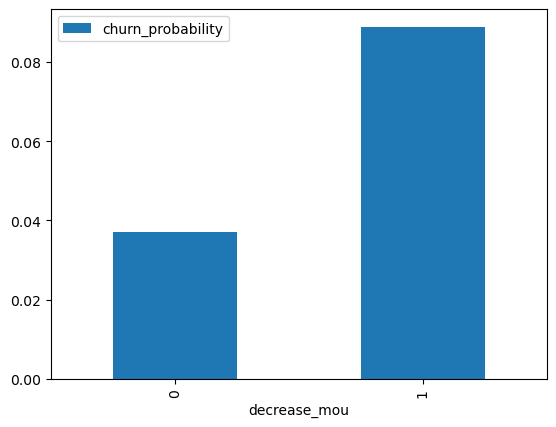

In [59]:
df_filter.pivot_table(values='churn_probability', index='decrease_mou', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

In [ ]:

df_filter.pivot_table(values='churn_probability', index='decrease_rech_num', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

In [ ]:
df_filter.pivot_table(values='churn_probability', index='decrease_arpu', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

In [ ]:
df_filter.pivot_table(values='churn_probability', index='decrease_vbc', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

# Analysis

1. We can see that the churn rate is more for the customers, whose minutes of usage(mou) decreased in the action phase than the good phase and same we see for number of rechanrges.
4. we see that he churn rate is more for the customers, whose volume based cost in action month is increased. This means the customers not doing the monthly recharge more when they are in the action phase.

# Train-test Split

In [62]:
# Import library
from sklearn.model_selection import train_test_split

In [63]:
# assigning feature variavle to value Y, and rest data to X
y = df_filter.churn_probability
X = df_filter.drop(['churn_probability'],axis=1)

In [64]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

### Dealing with data imbalance

We are creating synthetic samples by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique).

In [65]:
# Imporing SMOTE
from imblearn.over_sampling import SMOTE


In [66]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)

In [67]:
y_train.head()

33228    0
21130    0
11155    0
56380    0
44670    0
Name: churn_probability, dtype: int64

In [68]:
# Fittign SMOTE to the train set
X_train, y_train = sm.fit_resample(X_train,y_train)

## Feature Scaling 

In [69]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [70]:
# Instantiate the Scaler
scaler = StandardScaler()

In [71]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()
# Remove the derived columns as they are already binary
cols_scale.remove('decrease_mou')
cols_scale.remove('decrease_rech_num')
cols_scale.remove('decrease_rech_amt_action')
cols_scale.remove('decrease_arpu')
cols_scale.remove('decrease_vbc')

In [72]:
# Fit the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [73]:
X_train.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,decrease_rech_num,avg_arpu,diff_arpu,decrease_arpu,avg_vbc,diff_vbc,decrease_vbc,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action
0,-0.081402,0.0,0.0,0.0,-1.826945,1.504692,1.493526,-0.731150,0.517420,0.671349,...,0,1.690120,3.225104,0,-0.296088,-0.012176,0,1.860904,2.918256,0
1,-0.683124,0.0,0.0,0.0,0.257193,0.681718,0.389497,0.108174,-0.328220,-0.237392,...,0,0.591669,0.288258,0,-0.296088,-0.672771,1,0.591684,0.257007,1
2,-1.179254,0.0,0.0,0.0,-0.379216,0.272670,1.404112,-0.538430,-0.542782,-0.363480,...,0,0.993304,1.244292,0,-0.296088,-0.012176,0,0.910853,0.805171,0
3,1.070117,0.0,0.0,0.0,0.809688,0.314500,0.138885,-0.604667,-0.462894,-0.383296,...,1,0.248225,-0.537036,1,0.401709,0.693193,0,-0.155530,0.543719,0
4,0.487693,0.0,0.0,0.0,-0.344583,-0.539856,1.245649,-0.035463,-0.129089,1.065843,...,1,0.473442,0.746678,0,-0.296088,-0.012176,0,0.515620,0.753386,0


In [74]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,decrease_rech_num,avg_arpu,diff_arpu,decrease_arpu,avg_vbc,diff_vbc,decrease_vbc,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action
58165,1.158899,0.0,0.0,0.0,-1.744174,3.238023,3.493464,-0.750857,5.231093,5.493685,...,0,3.806450,5.041076,0,-0.296088,-0.012176,0,3.883304,4.984609,0
603,-1.704083,0.0,0.0,0.0,0.081349,-0.169669,0.561526,-0.188142,0.672017,1.076698,...,1,0.251861,0.149081,1,0.170878,-2.335622,1,0.241194,0.174908,1
28696,-0.306811,0.0,0.0,0.0,-0.157900,-0.043914,-0.055820,-0.619485,-0.403015,0.035684,...,1,-0.056740,0.097274,1,1.352219,0.992954,0,0.241194,-0.034758,1
34825,-0.001971,0.0,0.0,0.0,-0.047741,-0.314289,0.571584,2.085821,0.570001,4.332995,...,1,0.182524,0.208073,1,-0.296088,-1.219615,1,0.181536,0.283531,1
17757,-0.850888,0.0,0.0,0.0,0.545172,0.429146,0.969354,-0.513878,-0.566536,-0.455036,...,1,0.811400,0.214862,1,-0.296088,-0.012176,0,0.751269,0.149647,1


Lets also scale test set

In [75]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,decrease_rech_num,avg_arpu,diff_arpu,decrease_arpu,avg_vbc,diff_vbc,decrease_vbc,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action
58165,-1.734017,0.0,0.0,0.0,-1.919761,-1.868888,-1.190107,-0.756440,-0.705530,-0.539969,...,0,-1.694604,0.282041,0,-0.297128,-0.012230,0,-1.635392,0.313805,0
603,-1.734159,0.0,0.0,0.0,-1.913566,-1.880503,-1.198707,-0.755223,-0.715287,-0.551118,...,1,-1.707243,0.266477,1,-0.295487,-0.022664,1,-1.646256,0.301655,1
28696,-1.734090,0.0,0.0,0.0,-1.914378,-1.880074,-1.200518,-0.756156,-0.717588,-0.553746,...,1,-1.708340,0.266313,1,-0.291338,-0.007716,0,-1.646256,0.301126,1
34825,-1.734075,0.0,0.0,0.0,-1.914004,-1.880996,-1.198678,-0.750304,-0.715505,-0.542898,...,1,-1.707490,0.266665,1,-0.297128,-0.017653,1,-1.646434,0.301930,1
17757,-1.734117,0.0,0.0,0.0,-1.911992,-1.878462,-1.197511,-0.755927,-0.717937,-0.554985,...,1,-1.705253,0.266687,1,-0.297128,-0.012230,0,-1.644735,0.301591,1


# Modelling
PCA model

In [84]:
#Import PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA

In [77]:
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

In [82]:
pca.components_
variance_cumu = np.cumsum(pca.explained_variance_ratio_)

Text(0, 0.5, 'Cumulative Variance')

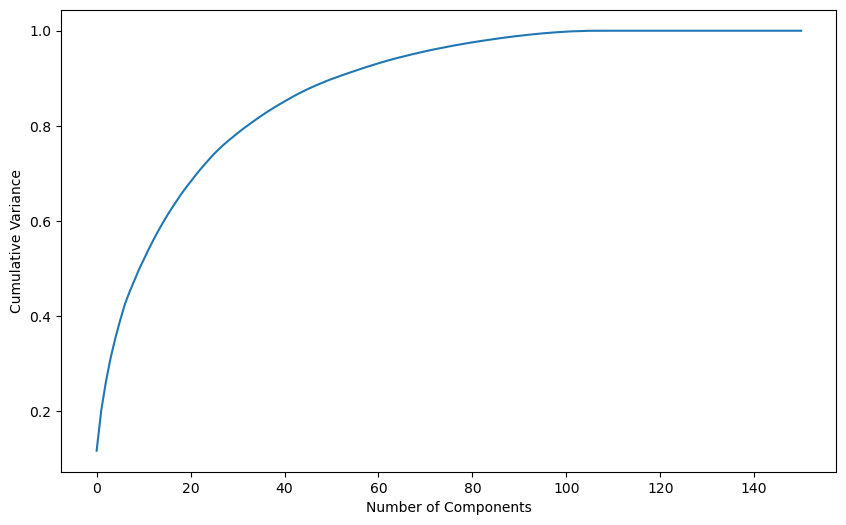

In [83]:
# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

From above plot looks 60 components are explained with 90% variance, hence will do PCA with 60 components

In [180]:
# Start PCA with 60
pca_final = IncrementalPCA(n_components=50)

In [181]:
# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)

Applying transformation on the test set

We are only doing Transform in the test set not the Fit-Transform. Because the Fitting is already done on the train set. So, we just have to do the transformation with the already fitted data on the train set.

In [182]:
X_test_pca = pca_final.transform(X_test)

Will focus on Sensitivity/Recall than Accuracy

We are more focused on higher Sensitivity/Recall score than the accuracy.

Beacuse we need to care more about churn cases than the not churn case



## Logistic Regression with PCA

In [183]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

#### Tuning hyperparameter  C
C is the penalty parameter, which represents misclassification or error term. Higher values of C correspond to less regularization.

In [184]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [185]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [186]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.198881,0.012246,0.003811,0.004129,0.01,{'C': 0.01},0.862376,0.863093,0.861508,0.864998,...,0.862864,0.001179,6,0.862824,0.866125,0.860956,0.863078,0.863663,0.863329,0.001666
1,0.267192,0.031244,0.010731,0.006501,0.1,{'C': 0.1},0.863036,0.863435,0.860511,0.864998,...,0.863400,0.001652,1,0.862573,0.866374,0.861957,0.862493,0.863663,0.863412,0.001581
2,0.345036,0.047517,0.013707,0.003581,1,{'C': 1},0.862376,0.862410,0.861508,0.864669,...,0.863263,0.001479,2,0.862991,0.866788,0.861206,0.862660,0.863580,0.863445,0.001846
3,0.324055,0.041693,0.008331,0.003886,10,{'C': 10},0.863036,0.861386,0.861508,0.864669,...,0.863190,0.001611,3,0.862573,0.866954,0.861290,0.862576,0.863413,0.863361,0.001920
4,0.323943,0.045489,0.005611,0.006003,100,{'C': 100},0.863036,0.861386,0.861508,0.864669,...,0.863190,0.001611,3,0.862490,0.866871,0.861290,0.862576,0.863246,0.863295,0.001896
5,0.362201,0.050457,0.006259,0.007665,1000,{'C': 1000},0.863036,0.861386,0.861508,0.864669,...,0.863190,0.001611,3,0.862490,0.866954,0.861290,0.862576,0.863246,0.863311,0.001927


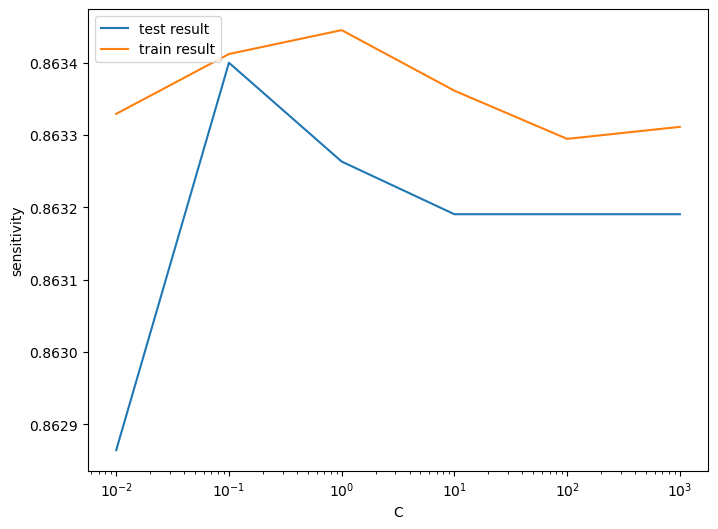

In [187]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [188]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']
print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.8633998221582724 at C = 0.1


### Logistic regression with optimal C

In [189]:
# Fit the model on the train set
logistic_pca = LogisticRegression(C=best_C)
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

In [190]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

In [191]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[12072  2928]
 [ 2032 12968]]


In [192]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [200]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))



Accuracy:- 0.8346666666666667
Sensitivity:- 0.9033457249070632


In [194]:
# Predictions on the train set
y_test_pred = log_pca_model.predict(X_test_pca)

In [195]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[1123 2609]
 [  26  243]]


In [196]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [198]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))



Accuracy:- 0.3414146463384154
Sensitivity:- 0.9033457249070632


***Model summary***

- Train set
    - Accuracy = 0.83
    - Sensitivity = 0.90
    
- Test set
    - Accuracy = 0.34
    - Sensitivity = 0.90
    
    
Overall, the sensitivity of the model is as well the test set as the train set.